In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, roc_auc_score)
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
print("=== BREAST CANCER DATASET OVERVIEW ===")
print(f"Dataset shape: {X.shape}")
print(f"Target classes: {data.target_names}")
print(f"Class distribution:")
unique, counts = np.unique(y, return_counts=True)
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"  {data.target_names[class_idx]}: {count} ({count/len(y)*100:.1f}%)")

=== BREAST CANCER DATASET OVERVIEW ===
Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']
Class distribution:
  malignant: 212 (37.3%)
  benign: 357 (62.7%)


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 455
Test set size: 114


In [5]:
# Train different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Dummy Classifier (Most Frequent)': DummyClassifier(strategy='most_frequent'),
    'Dummy Classifier (Uniform)': DummyClassifier(strategy='uniform', random_state=42)
}

In [6]:
print("MODEL COMPARISON - WHY ACCURACY ISN'T ENOUGH")
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 0] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    
    # For AUC, we need probabilities
    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = np.nan
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"\n{model_name}:")
    print(f"  Accuracy:  {accuracy:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    if not np.isnan(auc):
        print(f"  AUC:       {auc:.3f}")

MODEL COMPARISON - WHY ACCURACY ISN'T ENOUGH

Logistic Regression:
  Accuracy:  0.965
  Precision: 0.952
  Recall:    0.952
  F1-Score:  0.952
  AUC:       0.004

Dummy Classifier (Most Frequent):
  Accuracy:  0.632
  Precision: 0.000
  Recall:    0.000
  F1-Score:  0.000
  AUC:       0.500

Dummy Classifier (Uniform):
  Accuracy:  0.553
  Precision: 0.404
  Recall:    0.452
  F1-Score:  0.427
  AUC:       0.500


/home/mathanraj-sharma/miniconda3/envs/intro_ml_sjp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mathanraj-sharma/miniconda3/envs/intro_ml_sjp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# Create results DataFrame
results_df = pd.DataFrame(results)
print("SUMMARY TABLE:")
print(results_df.round(3).to_string(index=False))

print("KEY INSIGHTS - WHY ACCURACY ISN'T ENOUGH:")

print("\n1. CLASS IMBALANCE MASKING:")
print(f"   - Dataset has {counts[1]} benign vs {counts[0]} malignant cases")
print(f"   - Even a dummy classifier gets {results[2]['Accuracy']:.1%} accuracy!")
print(f"   - High accuracy doesn't mean the model is actually good")

print("\n2. COST OF MISCLASSIFICATION:")
print("   - False Negative (missing cancer): VERY HIGH COST")
print("   - False Positive (false alarm): Lower cost but still important")
print("   - Accuracy treats all errors equally - this is problematic!")

print("\n3. DIFFERENT METRICS TELL DIFFERENT STORIES:")
print("   - Precision: Of predicted positives, how many are actually positive?")
print("   - Recall: Of actual positives, how many did we catch?")
print("   - F1-Score: Harmonic mean of precision and recall")
print("   - AUC: Ability to distinguish between classes across all thresholds")

SUMMARY TABLE:
                           Model  Accuracy  Precision  Recall  F1-Score   AUC
             Logistic Regression     0.965      0.952   0.952     0.952 0.004
Dummy Classifier (Most Frequent)     0.632      0.000   0.000     0.000 0.500
      Dummy Classifier (Uniform)     0.553      0.404   0.452     0.427 0.500
KEY INSIGHTS - WHY ACCURACY ISN'T ENOUGH:

1. CLASS IMBALANCE MASKING:
   - Dataset has 357 benign vs 212 malignant cases
   - Even a dummy classifier gets 55.3% accuracy!
   - High accuracy doesn't mean the model is actually good

2. COST OF MISCLASSIFICATION:
   - False Negative (missing cancer): VERY HIGH COST
   - False Positive (false alarm): Lower cost but still important
   - Accuracy treats all errors equally - this is problematic!

3. DIFFERENT METRICS TELL DIFFERENT STORIES:
   - Precision: Of predicted positives, how many are actually positive?
   - Recall: Of actual positives, how many did we catch?
   - F1-Score: Harmonic mean of precision and recall
 

In [8]:
lg_model = models['Logistic Regression']
lg_pred = lg_model.predict(X_test)

print("DETAILED ANALYSIS - LOGISTIC REGRESSION CONFUSION MATRIX:")

cm = confusion_matrix(y_test, lg_pred, labels=[0, 1])
print("\nConfusion Matrix:")
print("                  Predicted")
print("                Malignant  Benign")
print(f"Actual Malignant    {cm[0,0]:3d}      {cm[0,1]:3d}")
print(f"       Benign       {cm[1,0]:3d}      {cm[1,1]:3d}")

print(f"\nBreaking down the errors:")
print(f"- True Negatives (correctly identified malignant): {cm[0,0]}")
print(f"- False Positives (benign classified as malignant): {cm[1,0]}")
print(f"- False Negatives (malignant missed as benign): {cm[0,1]}")
print(f"- True Positives (correctly identified benign): {cm[1,1]}")

print(f"\nIn medical context:")
print(f"- We missed {cm[0,1]} cancer cases (FALSE NEGATIVES) - This is critical!")
print(f"- We had {cm[1,0]} false alarms (FALSE POSITIVES) - Causes anxiety\n")

DETAILED ANALYSIS - LOGISTIC REGRESSION CONFUSION MATRIX:

Confusion Matrix:
                  Predicted
                Malignant  Benign
Actual Malignant     40        2
       Benign         2       70

Breaking down the errors:
- True Negatives (correctly identified malignant): 40
- False Positives (benign classified as malignant): 2
- False Negatives (malignant missed as benign): 2
- True Positives (correctly identified benign): 70

In medical context:
- We missed 2 cancer cases (FALSE NEGATIVES) - This is critical!
- We had 2 false alarms (FALSE POSITIVES) - Causes anxiety



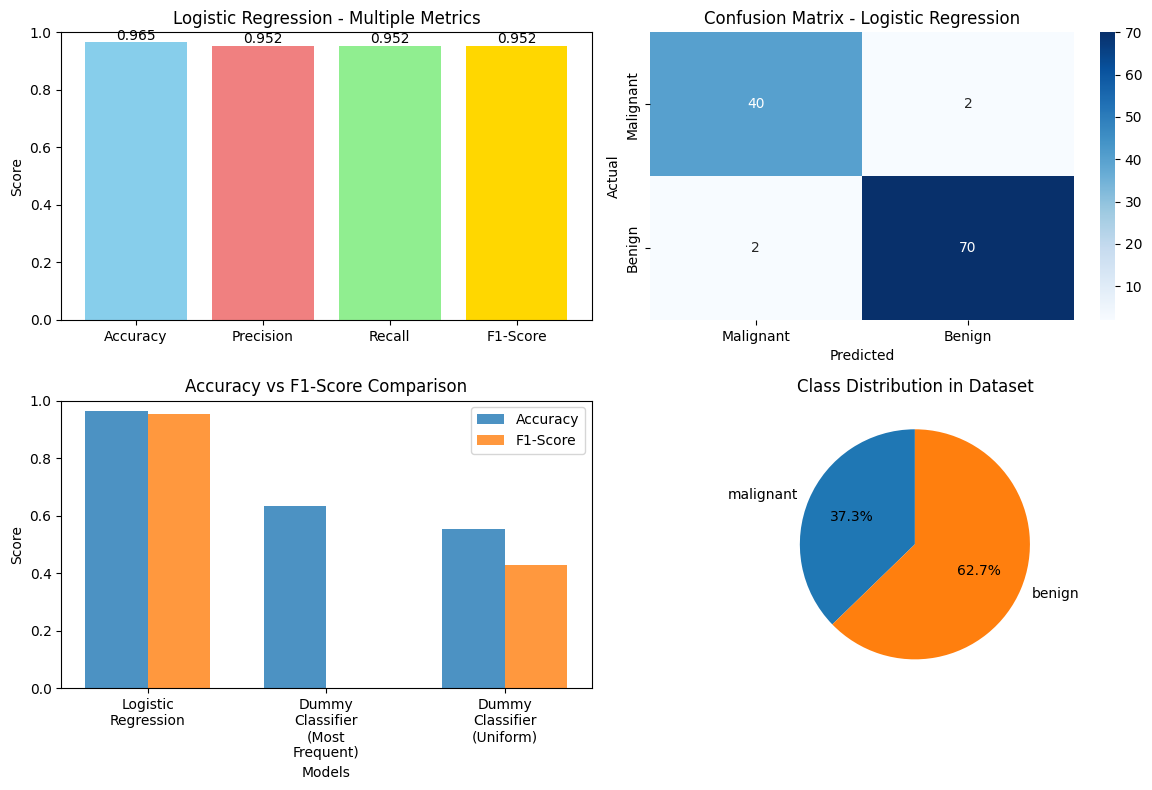


Visualization created showing:
1. Multiple metrics for logistic regression model
2. Confusion matrix showing error types
3. Comparison of accuracy vs F1-score across models
4. Dataset class distribution


In [9]:
# Create a simple visualization
plt.figure(figsize=(12, 8))

# Plot 1: Metrics comparison
plt.subplot(2, 2, 1)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lg_metrics = [results[0][metric] for metric in metrics_to_plot]
plt.bar(metrics_to_plot, lg_metrics, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Logistic Regression - Multiple Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
for i, v in enumerate(lg_metrics):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Plot 2: Confusion Matrix
plt.subplot(2, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot 3: Model comparison
plt.subplot(2, 2, 3)
model_names = [result['Model'].replace(' ', '\n') for result in results[:3]] 
accuracies = [result['Accuracy'] for result in results[:3]]
f1_scores = [result['F1-Score'] for result in results[:3]]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
plt.bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy vs F1-Score Comparison')
plt.xticks(x, model_names)
plt.legend()
plt.ylim(0, 1)

# Plot 4: Class distribution
plt.subplot(2, 2, 4)
plt.pie(counts, labels=data.target_names, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Dataset')

plt.tight_layout()
plt.show()

print("\nVisualization created showing:")
print("1. Multiple metrics for logistic regression model")
print("2. Confusion matrix showing error types")
print("3. Comparison of accuracy vs F1-score across models")
print("4. Dataset class distribution")


### RECOMMENDATIONS FOR MODEL EVALUATION
1. Always look at multiple metrics, not just accuracy
2. Consider the confusion matrix to understand error types
3. Use domain-specific metrics (e.g., sensitivity/specificity in medicine)
4. Consider the cost of different types of errors
5. Use cross-validation for more robust evaluation
6. Plot ROC curves and precision-recall curves
7. For imbalanced datasets, consider metrics like balanced accuracy

### WHEN ACCURACY IS MISLEADING
- Imbalanced datasets (like fraud detection, rare diseases)
- When different errors have different costs
- When you care more about finding positive cases (high recall)
- When you want to minimize false alarms (high precision)
- In multi-class problems with uneven class sizes



### Dummy Models

Including dummy classifiers is a crucial best practice in model evaluation.

##### 1. **Establishing a Baseline**
Dummy classifiers show the **minimum performance** any reasonable model should achieve. If your sophisticated model can't beat a simple "always predict the majority class" strategy, something is seriously wrong.

##### 2. **Exposing Dataset Bias**
In our breast cancer example:
- Dummy classifier (most frequent) gets ~63% accuracy just by always predicting "benign"
- This immediately reveals the dataset is imbalanced
- Without this comparison, you might think 70% accuracy is "good" when it's barely better than random guessing

##### 3. **Detecting Overfitting to Class Imbalance**
If your model's accuracy is only slightly better than the dummy classifier, it might just be learning to predict the majority class rather than finding meaningful patterns.

##### 4. **Providing Context for Other Metrics**
Look at the dummy classifier's metrics:
- High accuracy (63%) but terrible precision/recall for the minority class
- This shows why accuracy alone is misleading

##### 5. **Sanity Check**
It's a reality check. I've seen cases where:
- A "machine learning model" performed worse than random guessing
- Complex models barely outperformed simple heuristics
- The dummy classifier revealed the problem was too easy or the features were uninformative

##### Real-World Example:
Imagine you're detecting fraud (1% of transactions are fraudulent):
- Dummy classifier: 99% accuracy (always predict "not fraud")
- Your model: 99.2% accuracy
- Without the baseline, 99.2% sounds amazing
- With the baseline, you realize you only improved by 0.2%!

##### Different Dummy Strategies:
- **Most frequent**: Always predicts majority class
- **Uniform**: Random predictions with equal probability
- **Stratified**: Random predictions respecting class distribution
- **Constant**: Always predicts a specific class

Each serves a different purpose in understanding your model's performance relative to naive approaches.

**Bottom line**: Dummy classifiers aren't competitors to beat—they're diagnostic tools that reveal whether your model is actually learning meaningful patterns or just exploiting dataset characteristics.

In [10]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

y_pred_proba = lg_model.predict_proba(X_test)[:, 0]  # Get probabilities for the positive class

fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba, pos_label=0)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label=0)

# Example: Finding threshold that maximizes F1-score
f1_scores = []
for thres in pr_thresholds:
    y_pred_custom_thres = (y_pred_proba >= thres).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_custom_thres))

optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = pr_thresholds[optimal_threshold_idx]
print(f"Optimal threshold based on F1-score: {optimal_threshold}")

Optimal threshold based on F1-score: 3.1159230939104e-05


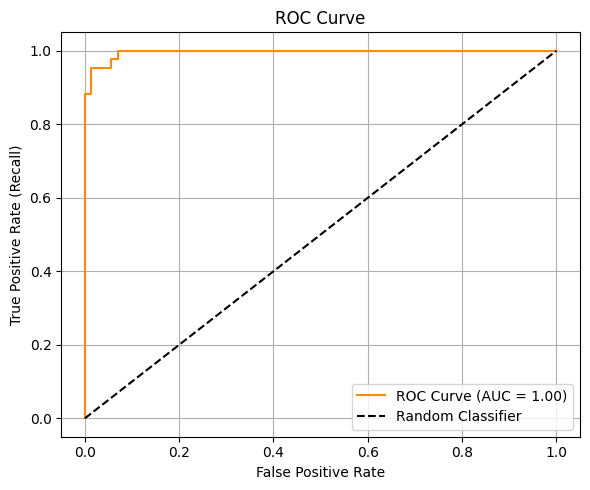

In [20]:
# Optional: calculate AUC
auc_score = roc_auc_score(y_test, 1 - y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

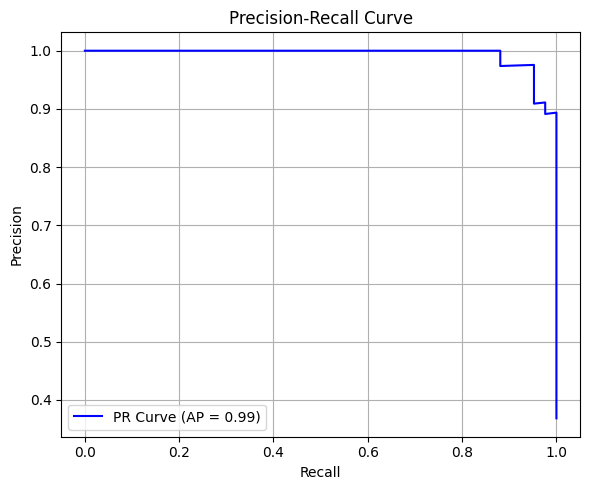

In [21]:
from sklearn.metrics import average_precision_score

# Optional: calculate average precision
ap_score = average_precision_score(y_test, y_pred_proba, pos_label=0)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.2f})', color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()